In [119]:
import utm
import sqlite3
import time

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from posSQL import get_boat_pos, get_home_pos, get_cbot_pos
from matplotlib.animation import FuncAnimation

No handles with labels found to put in legend.
Traceback (most recent call last):
  File "C:\Users\Saumya\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Saumya\anaconda3\lib\site-packages\matplotlib\animation.py", line 951, in _start
    self._init_draw()
  File "C:\Users\Saumya\anaconda3\lib\site-packages\matplotlib\animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\Saumya\anaconda3\lib\site-packages\matplotlib\animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: animate() takes 0 positional arguments but 1 was given


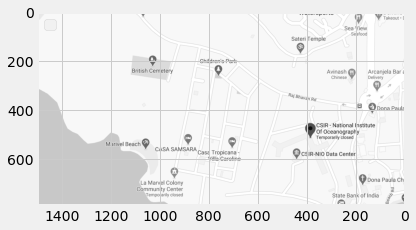

In [131]:


def getPlotData():
    
    # creating figure class
    fig = plt.figure()
    ax = fig.add_subplot()
   
    
    # getting refloc data (won't be updated)
    conn = sqlite3.connect('reference.db')
    cur = conn.cursor()
    cur.execute('SELECT * FROM locations')
    records = cur.fetchall()
    refloc = []
    for row in records:
        pos = [row[1],row[2]]
        refloc.append(pos)
    conn.close()
    
    loc1 = utm.from_latlon(float(refloc[0][0]),float(refloc[0][1]))
    loc2 = utm.from_latlon(float(refloc[1][0]),float(refloc[1][1]))
    
    
    # getting background image for map (won't be updated)
    FILE_PATH = 'UPLOAD/buffer.png'
    image = Image.open(FILE_PATH)
    width,height = image.size
    scale_x = width/abs(loc1[0]-loc2[0])
    scale_y = height/abs(loc1[1]-loc2[1])


    map_plot = Image.open(FILE_PATH).convert("L")
    arr = np.asarray(map_plot)
    bounding_box = (width,0,height,0)
    

    # getting data from database (has to be updated in realtime)  
    def animate():
        get_home = get_home_pos()
        get_boat = get_boat_pos()
        get_cbot = get_cbot_pos()

        HOME_POSITION = [float(get_home[1]),float(get_home[2])]   
        BOAT_POSITION = [float(get_boat[1]),float(get_boat[2])]
        CBOT_POSITION = [float(get_cbot[1]),float(get_cbot[2])]

        home = utm.from_latlon(HOME_POSITION[1],HOME_POSITION[0])
        boat = utm.from_latlon(BOAT_POSITION[1],BOAT_POSITION[0])
        cbot = utm.from_latlon(CBOT_POSITION[1],CBOT_POSITION[0])


        latitude = [(loc1[0]-home[0])*scale_x+width,(loc1[0]-boat[0])*scale_x+width,(loc1[0]-cbot[0])*scale_x+width]
        longitude = [(loc2[1]-home[1])*scale_y+height,(loc2[1]-boat[1])*scale_y+height,(loc2[1]-cbot[1])*scale_y+height]
        
        ax.scatter(latitude[0],longitude[0],color='green',s=20, label='home')
        ax.scatter(latitude[1],longitude[1],color='blue',s=20, label='boat')
        ax.scatter(latitude[2],longitude[2],color='red',s=20, label='c-bot')

        plt.cla()


    ani = FuncAnimation(plt.gcf(), animate,1000)
    
    # plotting the data onto the figure
    ax.imshow(arr,extent=bounding_box,cmap='gray')
    plt.legend(loc=2)
    plt.tight_layout()
    plt.show()
    
    return None
    

getPlotData()

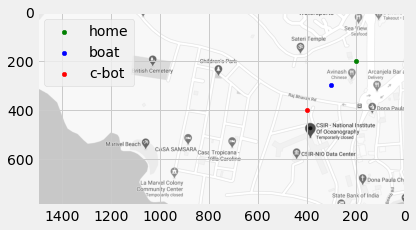

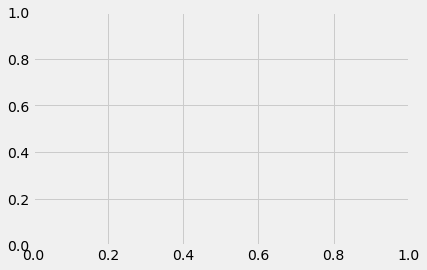

In [140]:


def getPlotData(a,b,c):
    
    # creating figure class
    fig = plt.figure()
    ax = fig.add_subplot()
   
    
    # getting refloc data (won't be updated)
    conn = sqlite3.connect('reference.db')
    cur = conn.cursor()
    cur.execute('SELECT * FROM locations')
    records = cur.fetchall()
    refloc = []
    for row in records:
        pos = [row[1],row[2]]
        refloc.append(pos)
    conn.close()
    
    loc1 = utm.from_latlon(float(refloc[0][0]),float(refloc[0][1]))
    loc2 = utm.from_latlon(float(refloc[1][0]),float(refloc[1][1]))
    
    
    # getting background image for map (won't be updated)
    FILE_PATH = 'UPLOAD/buffer.png'
    image = Image.open(FILE_PATH)
    width,height = image.size
    scale_x = width/abs(loc1[0]-loc2[0])
    scale_y = height/abs(loc1[1]-loc2[1])


    map_plot = Image.open(FILE_PATH).convert("L")
    arr = np.asarray(map_plot)
    bounding_box = (width,0,height,0)
       
    
    latitude = [a,b,c]
    longitude = [a,b,c]
    # plotting the data onto the figure
    ax.scatter(latitude[0],longitude[0],color='green',s=20, label='home')
    ax.scatter(latitude[1],longitude[1],color='blue',s=20, label='boat')
    ax.scatter(latitude[2],longitude[2],color='red',s=20, label='c-bot')
    ax.imshow(arr,extent=bounding_box,cmap='gray')
    plt.legend(loc=2)
    plt.tight_layout()
    plt.show()
    plt.cla()
    
    return None
    

getPlotData(200,300,400)

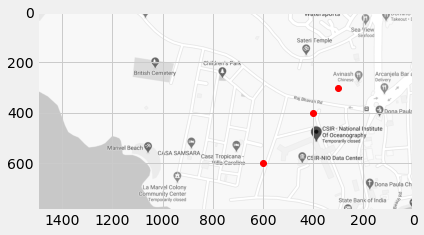

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [156]:


def getPlotData(a,b,c):
    
    # creating figure class
    fig = plt.figure()
    ax = fig.add_subplot()
   
    
    # getting refloc data (won't be updated)
    conn = sqlite3.connect('reference.db')
    cur = conn.cursor()
    cur.execute('SELECT * FROM locations')
    records = cur.fetchall()
    refloc = []
    for row in records:
        pos = [row[1],row[2]]
        refloc.append(pos)
    conn.close()
    
    loc1 = utm.from_latlon(float(refloc[0][0]),float(refloc[0][1]))
    loc2 = utm.from_latlon(float(refloc[1][0]),float(refloc[1][1]))
    
    
    # getting background image for map (won't be updated)
    FILE_PATH = 'UPLOAD/buffer.png'
    image = Image.open(FILE_PATH)
    width,height = image.size
    scale_x = width/abs(loc1[0]-loc2[0])
    scale_y = height/abs(loc1[1]-loc2[1])


    map_plot = Image.open(FILE_PATH).convert("L")
    arr = np.asarray(map_plot)
    bounding_box = (width,0,height,0)
       
    
    latitude = [a,b,c]
    longitude = [a,b,c]

    plt.ion() # turn interactive mode on
    animated_plot = plt.plot(X, Y, 'ro')[0]
    plt.imshow(arr,extent=bounding_box,cmap='gray')

    for i in range(3):
        animated_plot.set_xdata(latitude)
        animated_plot.set_ydata(longitude)
        plt.draw()
        plt.pause(0.1)

    return None
    

getPlotData(600,300,400)